In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Data Science\NLP\Day7_Duplicate_question_pair\questions.csv")

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.shape

(404351, 6)

In [6]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
327922,327922,643142,643143,How important is sex in a relationship?,Is sex really that important in maintaining lo...,1
37417,37417,74553,74554,What is the best exercise for the brain?,Which is the best brain exercise?,1
368843,368843,721846,721847,What is the difference between 100/125CC bike ...,What is the difference between a street bike a...,0
393823,393823,769653,769654,What's the word for someone who's against norm...,What is the word for being against normal beha...,1
298388,298388,586085,586086,"Why does Quora do this ""marked as needing impr...",What makes a question on Quora needing improve...,1
266806,266806,524861,524862,Where can I buy a wholesale of clothes online?,What's the best place to find cheap clothing o...,0
345644,345644,677342,677343,How do I apologize to my stubborn best friend?,How can I apologise to my best friend?,1
375962,375962,735494,735495,Why do people care so much about graphics in v...,Why do some people care so much about blocking...,0
276354,276354,543361,543362,When will US military leave European countries?,Should the US military leave Europe?,0
253816,253816,499631,499632,Are foot massages intimate?,Are foot massages sexual or not?,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [11]:
#Missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [12]:
#duplicated rows
df.duplicated().sum()

0

is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


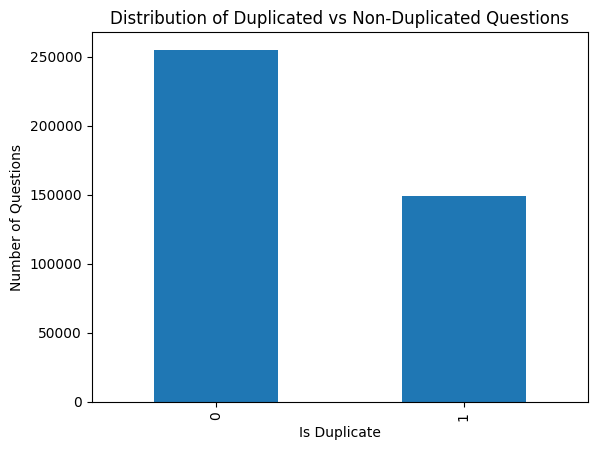

In [16]:
#distrubution of duplicated and non-duplicated questions
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

# Plotting the distribution
df['is_duplicate'].value_counts().plot(kind='bar')
plt.title("Distribution of Duplicated vs Non-Duplicated Questions")
plt.xlabel("Is Duplicate")
plt.ylabel("Number of Questions")
plt.show()

In [17]:
#Repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


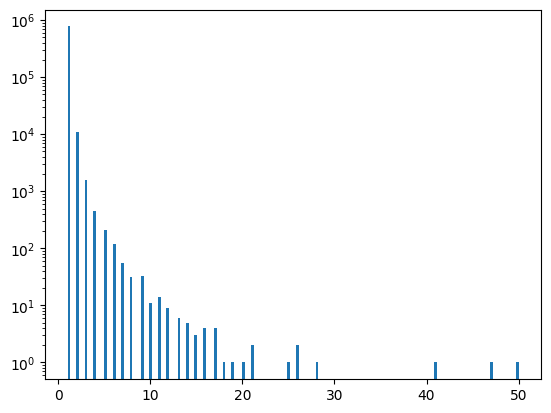

In [19]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

#questions kitne bar occor kar rahe hai